In [1]:
import pandas as pd
import numpy as np

In [2]:
import json, re
from konlpy.tag import Okt
from collections import Counter
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [3]:
data= pd.read_excel('comment-religion.xlsx')
data 

,label,contents
0,0,"""사비로 병원지불하도록해라.쓰레기들.."""
1,0,"""치료비 구상 청구해야 함ㆍ반드시 ! 교인들이 도대체 왜 이러지?"""
2,0,"""밥먹지말라는데 고집들은~~자영업자인 난 죽어난다 매일매일이 지옥인데 그만들..."
3,0,"""기독교라서 욕하는 게 아니고 욕하고 보니 기독교..."""
4,0,"""주님이 부르신다 치료받을생각말고 얼른 가라"""
...,...,...
901,1,캬~~빤스목사는 계획이 다 있었구나! (태극기 들고 따라서 했구나!)
902,1,재개발 시 어딜가나 교회가 젤 힘들다고 하더군요. 역시 돈의 노예들. 개독교
903,1,돈\n돈\n돈\n돈 밖에 모르는 개독교
904,1,사이비교회 그냥 허물어 버려요 하나님 번개를 쳐서 교회를 무너지게 ...


In [4]:
df = pd.read_excel('comment-religion.xlsx', engine='openpyxl')
df_ = df.rename(columns={'contents':''})
df_

,label,
0,0,"""사비로 병원지불하도록해라.쓰레기들.."""
1,0,"""치료비 구상 청구해야 함ㆍ반드시 ! 교인들이 도대체 왜 이러지?"""
2,0,"""밥먹지말라는데 고집들은~~자영업자인 난 죽어난다 매일매일이 지옥인데 그만들..."
3,0,"""기독교라서 욕하는 게 아니고 욕하고 보니 기독교..."""
4,0,"""주님이 부르신다 치료받을생각말고 얼른 가라"""
...,...,...
901,1,캬~~빤스목사는 계획이 다 있었구나! (태극기 들고 따라서 했구나!)
902,1,재개발 시 어딜가나 교회가 젤 힘들다고 하더군요. 역시 돈의 노예들. 개독교
903,1,돈\n돈\n돈\n돈 밖에 모르는 개독교
904,1,사이비교회 그냥 허물어 버려요 하나님 번개를 쳐서 교회를 무너지게 ...


In [5]:
df0 = df_.loc[df['label'] == 0]
df1 = df_.loc[df['label'] == 1]
df2 = df_.loc[df['label'] == 2]
df3 = df_.loc[df['label'] == 3]
df1_test = df1.drop(['label'], axis=1)
df1_test

,
271,"""그나마 다행인건 개독교 신도는 앞으로 팍팍 줄어들겁니다"""
324,"""지금 이 지경이 된건 개독교 힘이크지"""
529,개슬람을 받아들이는건 독재자를 받아들이는것이다.
533,개슬람국가 소속 개슬람인들은 그들 나름대로 이슬람종교의 교리를 실현하기 위해서 단체...
549,개슬람은 죄와 사망의 율법으로 사람을 판단하고 정죄하는 악마의 종교라고 생각합니다.
...,...
901,캬~~빤스목사는 계획이 다 있었구나! (태극기 들고 따라서 했구나!)
902,재개발 시 어딜가나 교회가 젤 힘들다고 하더군요. 역시 돈의 노예들. 개독교
903,돈\n돈\n돈\n돈 밖에 모르는 개독교
904,사이비교회 그냥 허물어 버려요 하나님 번개를 쳐서 교회를 무너지게 ...


In [6]:
df1_test.to_csv('df1.txt', sep = '\t', index=False)

In [7]:
file = open('C:/Users/admin/df1.txt', 'rt', encoding='UTF8')
f = file.readlines()
f


['""\n',
 '"""그나마 다행인건  개독교 신도는 앞으로 팍팍 줄어들겁니다"""\n',
 '"""지금 이 지경이 된건 개독교 힘이크지"""\n',
 '개슬람을 받아들이는건 독재자를 받아들이는것이다.\n',
 '개슬람국가 소속 개슬람인들은 그들 나름대로 이슬람종교의 교리를 실현하기 위해서 단체를 구성해 테러든 전쟁이든 서로 총을 겨누며 싸우고 있다....이건 팩트 아닌가..ㅋㅋ..어디서 약을..\n',
 '개슬람은 죄와 사망의 율법으로 사람을 판단하고 정죄하는 악마의 종교라고 생각합니다.\n',
 '"""예수믿고 천당 간다더니 이렇게 피해를 주면 갈수 있을려나 모르겠다 예수쟁이들"""\n',
 '"""이런죽일 예수쟁이들 제발쫌 그만들하거라 🐕들"""\n',
 '"""역시 개독교.... 너흰는 답이없다"""\n',
 '"""민주노총 다음으로 말 안듣는것들~ 이러니 예수재이들이라고 욕먹지~"""\n',
 '"""예수쟁이들 또 시작이네 니들은 탈레반 보다 극혐이다"""\n',
 '"""개신교입니다  구체적으로 ~\\n기독교는 천주교(...신부)와\\n개신교(...목사)가 모두 기독교이므로 \\n저들은 개신교가 맞습니다~~"""\n',
 '"""와 정말 답없다 개독교"""\n',
 '"""개신교 만쉐이~~~~"""\n',
 '"""미친교인들\\n잘하는 짓거리다 천벌 받아라"""\n',
 '"""개수쟁이들!,!!\\n그냥 죽는게 좋을 듯"""\n',
 '"""이런 개독들"""\n',
 '"""진짜 어디가나 이 교꾼들이 문제야 ~\\n지랄~ \\n회사 구내식당도 안하는데 이런 사이비들이 뭔\\n큰일한다고 모여서 쳐먹냐 ᆢ\\n집에 쌀 떨어진 떨거지들이 모여서 양푼띠기에\\n비벼서 같이 쳐먹었나보네~"""\n',
 '"""꼭 이런인간들이 쪼끔만 아프면 바로 큰병원 찾더라. 평소에는 개독티 팍팍내면서 행복하다는 해대면서 쬐끔 아프면 아프다고 징징대고 병원가야된다고 난리침. 진짜 주변에 이런인간들 은근히 많음"""\n',
 '"""아주 잘하고 있어 !!!!  알고보면 니

In [8]:
twitter = Okt()
morphs = []



for sentence in f:
    morphs.append(twitter.pos(sentence))
    
print(morphs)




[[('""', 'Punctuation'), ('\n', 'Foreign')], [('"""', 'Punctuation'), ('그나마', 'Adverb'), ('다행', 'Noun'), ('인', 'Josa'), ('건', 'Noun'), ('개독교', 'Noun'), ('신도', 'Noun'), ('는', 'Josa'), ('앞', 'Noun'), ('으로', 'Josa'), ('팍팍', 'Adverb'), ('줄어들', 'Verb'), ('겁니다', 'Verb'), ('"""', 'Punctuation'), ('\n', 'Foreign')], [('"""', 'Punctuation'), ('지금', 'Noun'), ('이', 'Noun'), ('지경', 'Noun'), ('이', 'Josa'), ('된건', 'Verb'), ('개독교', 'Noun'), ('힘', 'Noun'), ('이크', 'Noun'), ('지', 'Josa'), ('"""', 'Punctuation'), ('\n', 'Foreign')], [('개슬람', 'Noun'), ('을', 'Josa'), ('받아들이는건', 'Verb'), ('독재자', 'Noun'), ('를', 'Josa'), ('받아들이는것이다', 'Verb'), ('.', 'Punctuation'), ('\n', 'Foreign')], [('개슬람국', 'Noun'), ('가', 'Josa'), ('소속', 'Noun'), ('개슬람', 'Noun'), ('인들', 'Josa'), ('은', 'Noun'), ('그', 'Noun'), ('들', 'Suffix'), ('나름', 'Noun'), ('대로', 'Josa'), ('이슬람', 'Noun'), ('종교', 'Noun'), ('의', 'Josa'), ('교리', 'Noun'), ('를', 'Josa'), ('실현', 'Noun'), ('하기', 'Verb'), ('위해', 'Noun'), ('서', 'Josa'), ('단체', 'Noun'), ('를', 'Josa

In [9]:
noun_list = []

for i in morphs:
    for word, tag in i:
        if tag in['Noun']:
            if len(word)>1:
                noun_list.append(word)

print(noun_list)

['다행', '개독교', '신도', '지금', '지경', '개독교', '이크', '개슬람', '독재자', '개슬람국', '소속', '개슬람', '나름', '이슬람', '종교', '교리', '실현', '위해', '단체', '구성', '테러', '전쟁', '서로', '겨누', '이건', '팩트', '개슬람', '사망', '율법', '사람', '판단', '정죄', '악마', '종교', '생각', '예수', '천당', '간다', '더니', '피해', '갈수', '예수', '예수', '제발', '역시', '개독교', '민주', '노총', '다음', '수재', '예수', '시작', '탈레반', '극혐', '개신교', '구체', '기독교', '천주교', '신부', '개신교', '목사', '모두', '기독교', '개신교', '정말', '개독교', '개신교', '만쉐이', '교인', '짓거리', '천벌', '개수', '그냥', '개독', '진짜', '어디가', '문제', '지랄', '회사', '구내식당', '사이비', '큰일', '거지', '양푼', '띠기', '인간', '쪼끔', '바로', '병원', '평소', '개독', '내면', '해대', '면서', '병원', '가야', '진짜', '주변', '인간', '은근', '아주', '개독교', '소멸', '신들', '종교', '세금', '마귀', '교회', '진짜', '비지니스', '종교', '코로나', '와중', '출석', '교횟것들', '주님', '코로나', '집단', '감염', '각자', '주님', '전부', '외지', '주님', '이유', '거기', '주민', '주님', '가든', '아우', '진짜', '교횟것들', '이쯤', '개독', '단어', '사전', '재해', '교회', '사형', '코로나', '계기', '개독', '얼마나', '정신', '병자', '여실히', '미꾸라지', '마리', '사건', '보기', '빈도', '나무', '구상권', '청구', '징글징글', '교회', '개보', '개독교', '너희', '진

In [10]:
#빈도수로 정렬

count = Counter(noun_list)

words = (dict(count.most_common()))
print(words)

{'예수': 15, '개독': 15, '종교': 11, '개독교': 10, '개슬람': 10, '교회': 9, '코로나': 8, '진짜': 7, '기독교': 6, '하나님': 6, '테러': 5, '스님': 5, '개신교': 4, '목사': 4, '문제': 4, '사이비': 4, '세금': 4, '주님': 4, '집단': 4, '대한민국': 4, '다행': 3, '단체': 3, '사람': 3, '악마': 3, '그냥': 3, '인간': 3, '거기': 3, '정신': 3, '사탄': 3, '땡중': 3, '기도': 3, '헌법': 3, '모든': 3, '게슬람': 3, '개슬람국': 2, '이슬람': 2, '교리': 2, '위해': 2, '역시': 2, '민주': 2, '다음': 2, '정말': 2, '거지': 2, '병원': 2, '마귀': 2, '교횟것들': 2, '각자': 2, '전부': 2, '이쯤': 2, '징글징글': 2, '진정': 2, '위반': 2, '중놈': 2, '속세': 2, '수행': 2, '생활': 2, '종교인': 2, '시대': 2, '돈벌이': 2, '마음': 2, '자기': 2, '나라': 2, '업무': 2, '종자': 2, '사회': 2, '치료': 2, '휴거': 2, '지옥': 2, '기사': 2, '테러리스트': 2, '국가': 2, '극단': 2, '주의': 2, '개슬람교': 2, '새끼': 2, '신도': 1, '지금': 1, '지경': 1, '이크': 1, '독재자': 1, '소속': 1, '나름': 1, '실현': 1, '구성': 1, '전쟁': 1, '서로': 1, '겨누': 1, '이건': 1, '팩트': 1, '사망': 1, '율법': 1, '판단': 1, '정죄': 1, '생각': 1, '천당': 1, '간다': 1, '더니': 1, '피해': 1, '갈수': 1, '제발': 1, '노총': 1, '수재': 1, '시작': 1, '탈레반': 1, '극혐': 1, '구체': 1, '천주교': 1, '신부'

In [11]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords

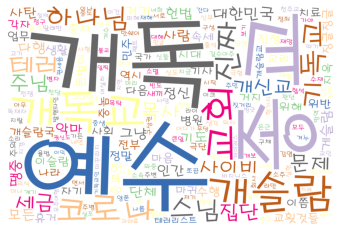

In [12]:
wordcloud = WordCloud(font_path = 'C:/Users/admin/hypost-light/HYPost-Light.ttf', background_color='white',colormap = "Accent_r", 
                      width=3000, height=2000).generate_from_frequencies(words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()
wordcloud.to_file("output_퀴어.jpg")